the mean of the target = 4600.663094339622
the median of the target = 4270.0


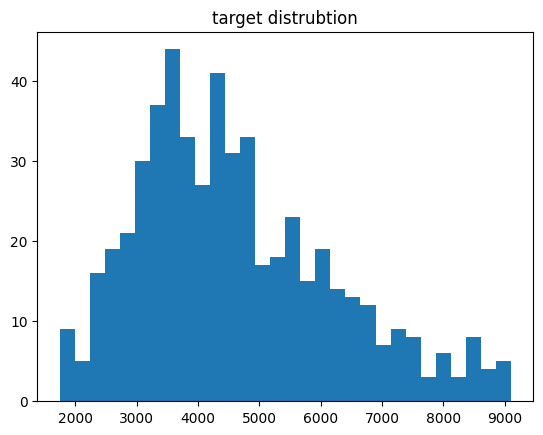

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv("cleaned_data.csv")
data = data.sample(frac=1 , random_state=42).reset_index(drop=True)



print(f"the mean of the target = {data['price'].mean()}")
print(f"the median of the target = {data['price'].median()}")



plt.hist(data['price'] , bins=30)
plt.title("target distrubtion")
plt.show()


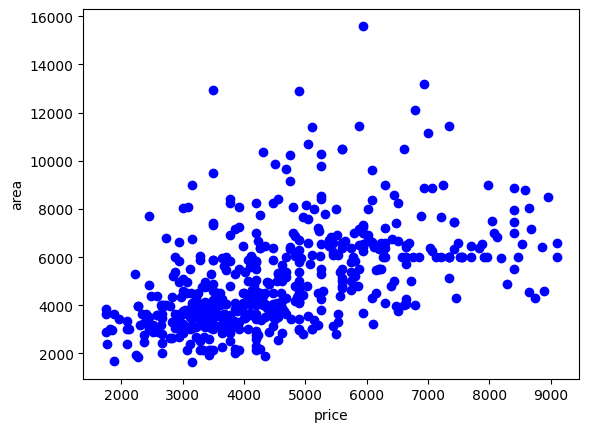

In [13]:
area = data['area']
target = data['price']

plt.scatter(target , area , color= 'blue' )
plt.xlabel('price')
plt.ylabel('area')
plt.show()

In [14]:
data['stories'].sort_values(ascending=True).unique()

array([1, 2, 3, 4])

In [ ]:
from preprocessing import corr_matrix


corr_matrix = corr_matrix.drop(columns=['price'] ,index=['price'])
corr_list = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):  # j starts from i+1 to avoid duplicates and self-corr
        if corr_matrix.iloc[i, j] > 0.50:
            corr_list.append([corr_matrix.index[i], corr_matrix.columns[j] ,corr_matrix.iloc[i, j] ])


for cor in corr_list:
    print(cor)

['area', 'area_per_room', np.float64(0.5711170679002846)]
['bedrooms', 'total_rooms', np.float64(0.6112917337812375)]
['bathrooms', 'total_rooms', np.float64(0.5151976288738315)]
['stories', 'total_rooms', np.float64(0.9401624782090561)]


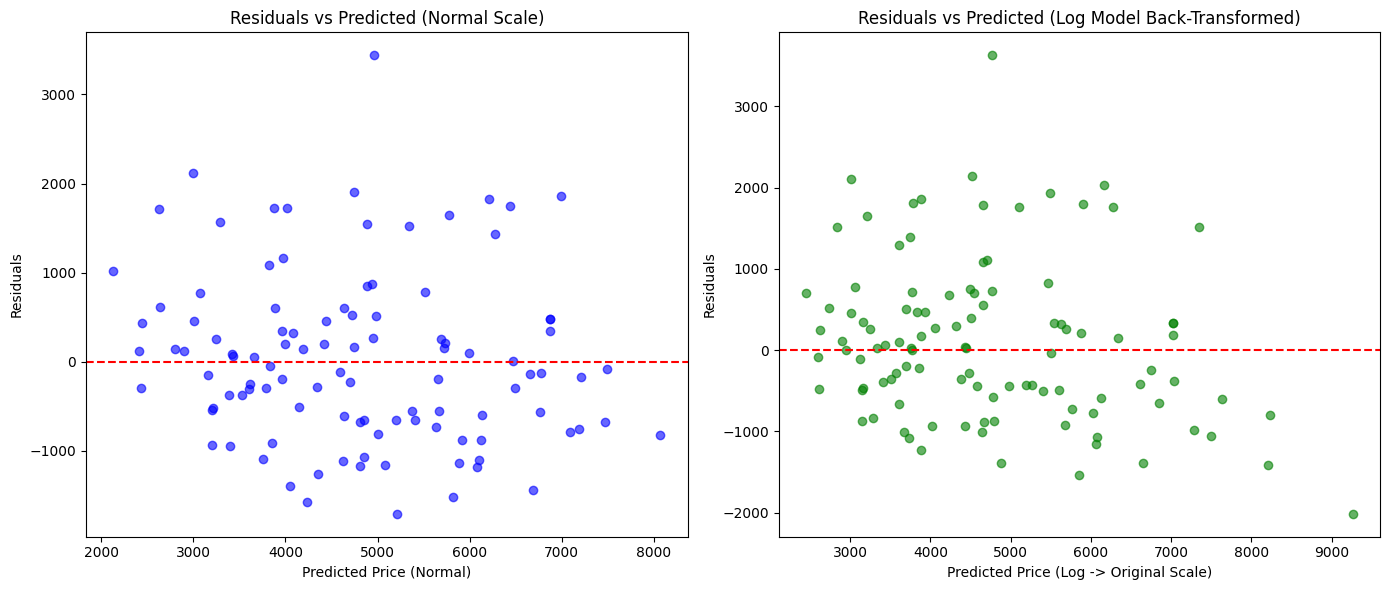

In [29]:
from testing import prediction_normal , prediction_log , y_test

import matplotlib.pyplot as plt
import numpy as np

# Assume these are your predictions from both models
# normal model:
y_pred_normal = prediction_normal   # your model.predict(x_test) without log
y_true = y_test          # actual prices

# log model (back-transformed):
y_pred_log = prediction_log        # np.exp(your_log_model.predict(x_test))

# Compute residuals
residuals_normal = y_true - y_pred_normal
residuals_log = y_true - y_pred_log

# Create figure
plt.figure(figsize=(14,6))

# Plot 1: normal scale residuals
plt.subplot(1,2,1)
plt.scatter(y_pred_normal, residuals_normal, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (Normal)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Normal Scale)")

# Plot 2: log model residuals (back-transformed)
plt.subplot(1,2,2)
plt.scatter(y_pred_log, residuals_log, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (Log -> Original Scale)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Log Model Back-Transformed)")

plt.tight_layout()
plt.show()